In [1]:
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models, datasets
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import time
from utils_jnb import *

torch.manual_seed(0)

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
directory = "./src"

In [5]:
num_classes = 2

vgg19 = models.vgg19_bn(pretrained=True)

# Freeze model parameters
# Same for all
for param in vgg19.parameters():
    param.requires_grad = False

vgg19.classifier = nn.Sequential(nn.Linear(25088, 4096),
nn.LeakyReLU(),
nn.Dropout(0.4),
nn.Linear(4096, 2048),
nn.LeakyReLU(),
nn.Dropout(0.2),
nn.Linear(2048, 1024),
nn.LeakyReLU(),                                 
nn.Dropout(0.2),
nn.Linear(1024, num_classes),
nn.LogSoftmax(dim=1))

In [9]:
# Define Optimizer and Loss Function
lossFunc = nn.CrossEntropyLoss()
optimizer = optim.RAdam(vgg19.parameters(), lr=1e-2) #https://arxiv.org/pdf/1908.03265.pdf

# Decay LR by a factor of 0.1 every 7 epochs
expLrScheduler = lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)

vgg19.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [10]:
summary(vgg19, input_size=(3, 224, 224), batch_size=32)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       (1,792)
|    └─BatchNorm2d: 2-2                  (128)
|    └─ReLU: 2-3                         --
|    └─Conv2d: 2-4                       (36,928)
|    └─BatchNorm2d: 2-5                  (128)
|    └─ReLU: 2-6                         --
|    └─MaxPool2d: 2-7                    --
|    └─Conv2d: 2-8                       (73,856)
|    └─BatchNorm2d: 2-9                  (256)
|    └─ReLU: 2-10                        --
|    └─Conv2d: 2-11                      (147,584)
|    └─BatchNorm2d: 2-12                 (256)
|    └─ReLU: 2-13                        --
|    └─MaxPool2d: 2-14                   --
|    └─Conv2d: 2-15                      (295,168)
|    └─BatchNorm2d: 2-16                 (512)
|    └─ReLU: 2-17                        --
|    └─Conv2d: 2-18                      (590,080)
|    └─BatchNorm2d: 2-19                 (512)
|    └─ReLU: 2-

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       (1,792)
|    └─BatchNorm2d: 2-2                  (128)
|    └─ReLU: 2-3                         --
|    └─Conv2d: 2-4                       (36,928)
|    └─BatchNorm2d: 2-5                  (128)
|    └─ReLU: 2-6                         --
|    └─MaxPool2d: 2-7                    --
|    └─Conv2d: 2-8                       (73,856)
|    └─BatchNorm2d: 2-9                  (256)
|    └─ReLU: 2-10                        --
|    └─Conv2d: 2-11                      (147,584)
|    └─BatchNorm2d: 2-12                 (256)
|    └─ReLU: 2-13                        --
|    └─MaxPool2d: 2-14                   --
|    └─Conv2d: 2-15                      (295,168)
|    └─BatchNorm2d: 2-16                 (512)
|    └─ReLU: 2-17                        --
|    └─Conv2d: 2-18                      (590,080)
|    └─BatchNorm2d: 2-19                 (512)
|    └─ReLU: 2-

In [11]:
history = trainValid(vgg19, lossFunc, optimizer, epochs=25)

[4996, 556]
5552
Epoch: 1/25
Batch number: 000, Training: Loss: 16.4565, Accuracy: 0.8125
Batch number: 001, Training: Loss: 1101.1713, Accuracy: 0.6875
Batch number: 002, Training: Loss: 957.2845, Accuracy: 0.3125
Batch number: 003, Training: Loss: 4557.0913, Accuracy: 0.6562
Batch number: 004, Training: Loss: 22776.5293, Accuracy: 0.5312
Batch number: 005, Training: Loss: 246293.3281, Accuracy: 0.6875
Batch number: 006, Training: Loss: 110893.2109, Accuracy: 0.7500
Batch number: 007, Training: Loss: 351331.0312, Accuracy: 0.5312
Batch number: 008, Training: Loss: 200811.0312, Accuracy: 0.6250
Batch number: 009, Training: Loss: 250860.0156, Accuracy: 0.6562
Batch number: 010, Training: Loss: 155700.7812, Accuracy: 0.7500
Batch number: 011, Training: Loss: 427349.5312, Accuracy: 0.4688
Batch number: 012, Training: Loss: 260458.4062, Accuracy: 0.6250
Batch number: 013, Training: Loss: 296933.7812, Accuracy: 0.5625
Batch number: 014, Training: Loss: 189688.2500, Accuracy: 0.5938
Batch nu

Batch number: 129, Training: Loss: 1859.8978, Accuracy: 0.6250
Batch number: 130, Training: Loss: 15643.6172, Accuracy: 0.7812
Batch number: 131, Training: Loss: 31740.6250, Accuracy: 0.6562
Batch number: 132, Training: Loss: 240.1855, Accuracy: 0.9375
Batch number: 133, Training: Loss: 717.2222, Accuracy: 0.8438
Batch number: 134, Training: Loss: 11526.2168, Accuracy: 0.8125
Batch number: 135, Training: Loss: 4325.5576, Accuracy: 0.9062
Batch number: 136, Training: Loss: 1802.7731, Accuracy: 0.7812
Batch number: 137, Training: Loss: 2277.6079, Accuracy: 0.8125
Batch number: 138, Training: Loss: 1381.6567, Accuracy: 0.7812
Batch number: 139, Training: Loss: 84.2407, Accuracy: 0.9688
Batch number: 140, Training: Loss: 2334.5151, Accuracy: 0.8438
Batch number: 141, Training: Loss: 2673.0640, Accuracy: 0.8438
Batch number: 142, Training: Loss: 1811.6631, Accuracy: 0.9062
Batch number: 143, Training: Loss: 836.8773, Accuracy: 0.7500
Batch number: 144, Training: Loss: 16442.5762, Accuracy: 

Validation Batch number: 088, Validation: Loss: 318.6035, Accuracy: 0.7500
Validation Batch number: 089, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 090, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 091, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 092, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 093, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 094, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 095, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 096, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 097, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 098, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 099, Validation: Loss: 175.0572, Accuracy: 0.7500
Validation Batch number: 100, Validation: Loss: 248.9666, Accuracy: 0.7500
Validation Batch number: 101, Validation: Los

Batch number: 068, Training: Loss: 515.3684, Accuracy: 0.8750
Batch number: 069, Training: Loss: 779.8513, Accuracy: 0.8125
Batch number: 070, Training: Loss: 325.7753, Accuracy: 0.7812
Batch number: 071, Training: Loss: 475.4532, Accuracy: 0.8438
Batch number: 072, Training: Loss: 1325.3293, Accuracy: 0.8438
Batch number: 073, Training: Loss: 794.3320, Accuracy: 0.7812
Batch number: 074, Training: Loss: 522.4557, Accuracy: 0.8438
Batch number: 075, Training: Loss: 1553.8423, Accuracy: 0.7188
Batch number: 076, Training: Loss: 1370.0671, Accuracy: 0.7500
Batch number: 077, Training: Loss: 96.7980, Accuracy: 0.9688
Batch number: 078, Training: Loss: 1115.1835, Accuracy: 0.7500
Batch number: 079, Training: Loss: 384.4960, Accuracy: 0.8438
Batch number: 080, Training: Loss: 1515.9148, Accuracy: 0.7188
Batch number: 081, Training: Loss: 546.8597, Accuracy: 0.8750
Batch number: 082, Training: Loss: 253.5388, Accuracy: 0.8438
Batch number: 083, Training: Loss: 700.3607, Accuracy: 0.8750
Batc

Validation Batch number: 040, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 041, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 042, Validation: Loss: 916.2383, Accuracy: 0.5000
Validation Batch number: 043, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 044, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 045, Validation: Loss: 299.6958, Accuracy: 0.7500
Validation Batch number: 046, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 047, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 048, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 049, Validation: Loss: 2.6612, Accuracy: 0.7500
Validation Batch number: 050, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 051, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 052, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 053, Validation: Loss:

Batch number: 011, Training: Loss: 775.6402, Accuracy: 0.7812
Batch number: 012, Training: Loss: 493.8561, Accuracy: 0.9062
Batch number: 013, Training: Loss: 442.2932, Accuracy: 0.7812
Batch number: 014, Training: Loss: 164.9214, Accuracy: 0.8750
Batch number: 015, Training: Loss: 227.9613, Accuracy: 0.8750
Batch number: 016, Training: Loss: 1858.3508, Accuracy: 0.6250
Batch number: 017, Training: Loss: 738.3302, Accuracy: 0.8438
Batch number: 018, Training: Loss: 557.7275, Accuracy: 0.8438
Batch number: 019, Training: Loss: 506.2981, Accuracy: 0.8750
Batch number: 020, Training: Loss: 375.1873, Accuracy: 0.9375
Batch number: 021, Training: Loss: 842.5221, Accuracy: 0.8125
Batch number: 022, Training: Loss: 235.2711, Accuracy: 0.8750
Batch number: 023, Training: Loss: 378.2838, Accuracy: 0.7500
Batch number: 024, Training: Loss: 696.5094, Accuracy: 0.7500
Batch number: 025, Training: Loss: 866.7950, Accuracy: 0.7500
Batch number: 026, Training: Loss: 1254.3357, Accuracy: 0.8750
Batch 

Batch number: 144, Training: Loss: 577.9210, Accuracy: 0.8438
Batch number: 145, Training: Loss: 476.4628, Accuracy: 0.7500
Batch number: 146, Training: Loss: 118.4287, Accuracy: 0.9688
Batch number: 147, Training: Loss: 696.8038, Accuracy: 0.6250
Batch number: 148, Training: Loss: 1014.3241, Accuracy: 0.7500
Batch number: 149, Training: Loss: 230.1702, Accuracy: 0.8438
Batch number: 150, Training: Loss: 122.5285, Accuracy: 0.9062
Batch number: 151, Training: Loss: 320.1218, Accuracy: 0.8750
Batch number: 152, Training: Loss: 395.0524, Accuracy: 0.8750
Batch number: 153, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 154, Training: Loss: 1060.8606, Accuracy: 0.8125
Batch number: 155, Training: Loss: 715.4443, Accuracy: 0.8438
Validation Batch number: 000, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 001, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 002, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 003, Validat

Validation Batch number: 103, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 104, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 105, Validation: Loss: 344.3675, Accuracy: 0.7500
Validation Batch number: 106, Validation: Loss: 271.3312, Accuracy: 0.7500
Validation Batch number: 107, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 108, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 109, Validation: Loss: 2071.3296, Accuracy: 0.5000
Validation Batch number: 110, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 111, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 112, Validation: Loss: 37.5545, Accuracy: 0.7500
Validation Batch number: 113, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 114, Validation: Loss: 1282.8560, Accuracy: 0.7500
Validation Batch number: 115, Validation: Loss: 220.8432, Accuracy: 0.7500
Validation Batch number: 116, Validati

Batch number: 086, Training: Loss: 228.7256, Accuracy: 0.8438
Batch number: 087, Training: Loss: 527.7550, Accuracy: 0.7812
Batch number: 088, Training: Loss: 238.8153, Accuracy: 0.8125
Batch number: 089, Training: Loss: 11.8312, Accuracy: 0.9688
Batch number: 090, Training: Loss: 239.3406, Accuracy: 0.8750
Batch number: 091, Training: Loss: 319.0813, Accuracy: 0.8125
Batch number: 092, Training: Loss: 174.6805, Accuracy: 0.9062
Batch number: 093, Training: Loss: 603.9626, Accuracy: 0.7500
Batch number: 094, Training: Loss: 292.0737, Accuracy: 0.9062
Batch number: 095, Training: Loss: 260.6985, Accuracy: 0.8750
Batch number: 096, Training: Loss: 307.3218, Accuracy: 0.9062
Batch number: 097, Training: Loss: 273.4055, Accuracy: 0.8438
Batch number: 098, Training: Loss: 405.7808, Accuracy: 0.8750
Batch number: 099, Training: Loss: 357.8456, Accuracy: 0.9375
Batch number: 100, Training: Loss: 336.1550, Accuracy: 0.8438
Batch number: 101, Training: Loss: 238.8470, Accuracy: 0.8750
Batch num

Validation Batch number: 056, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 057, Validation: Loss: 400.6074, Accuracy: 0.5000
Validation Batch number: 058, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 059, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 060, Validation: Loss: 107.1092, Accuracy: 0.7500
Validation Batch number: 061, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 062, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 063, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 064, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 065, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 066, Validation: Loss: 847.6157, Accuracy: 0.7500
Validation Batch number: 067, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 068, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 069, Validation: Los

Batch number: 031, Training: Loss: 266.0273, Accuracy: 0.8125
Batch number: 032, Training: Loss: 405.7299, Accuracy: 0.8125
Batch number: 033, Training: Loss: 208.7097, Accuracy: 0.7500
Batch number: 034, Training: Loss: 367.2122, Accuracy: 0.8125
Batch number: 035, Training: Loss: 522.9421, Accuracy: 0.8750
Batch number: 036, Training: Loss: 244.9585, Accuracy: 0.8750
Batch number: 037, Training: Loss: 120.4871, Accuracy: 0.8438
Batch number: 038, Training: Loss: 215.4442, Accuracy: 0.9375
Batch number: 039, Training: Loss: 346.9498, Accuracy: 0.8438
Batch number: 040, Training: Loss: 266.4713, Accuracy: 0.8438
Batch number: 041, Training: Loss: 3.7470, Accuracy: 0.9688
Batch number: 042, Training: Loss: 162.4068, Accuracy: 0.8438
Batch number: 043, Training: Loss: 79.2163, Accuracy: 0.9062
Batch number: 044, Training: Loss: 244.2271, Accuracy: 0.8750
Batch number: 045, Training: Loss: 237.7764, Accuracy: 0.8438
Batch number: 046, Training: Loss: 125.8720, Accuracy: 0.8438
Batch numbe

Validation Batch number: 011, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 012, Validation: Loss: 29.2019, Accuracy: 0.7500
Validation Batch number: 013, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 014, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 015, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 016, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 017, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 018, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 019, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 020, Validation: Loss: 524.0316, Accuracy: 0.7500
Validation Batch number: 021, Validation: Loss: 892.6174, Accuracy: 0.5000
Validation Batch number: 022, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 023, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 024, Validation: Loss

Validation Batch number: 123, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 124, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 125, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 126, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 127, Validation: Loss: 568.1462, Accuracy: 0.7500
Validation Batch number: 128, Validation: Loss: 81.1023, Accuracy: 0.7500
Validation Batch number: 129, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 130, Validation: Loss: 316.3296, Accuracy: 0.7500
Validation Batch number: 131, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 132, Validation: Loss: 439.5230, Accuracy: 0.7500
Validation Batch number: 133, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 134, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 135, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 136, Validation: Lo

Batch number: 111, Training: Loss: 232.1964, Accuracy: 0.8438
Batch number: 112, Training: Loss: 270.1215, Accuracy: 0.8438
Batch number: 113, Training: Loss: 112.2649, Accuracy: 0.8750
Batch number: 114, Training: Loss: 97.1852, Accuracy: 0.9062
Batch number: 115, Training: Loss: 179.6609, Accuracy: 0.9062
Batch number: 116, Training: Loss: 128.3109, Accuracy: 0.9062
Batch number: 117, Training: Loss: 189.9405, Accuracy: 0.8438
Batch number: 118, Training: Loss: 298.5681, Accuracy: 0.8125
Batch number: 119, Training: Loss: 194.6493, Accuracy: 0.8438
Batch number: 120, Training: Loss: 64.5231, Accuracy: 0.9062
Batch number: 121, Training: Loss: 147.3401, Accuracy: 0.8750
Batch number: 122, Training: Loss: 70.5169, Accuracy: 0.9062
Batch number: 123, Training: Loss: 218.3793, Accuracy: 0.8438
Batch number: 124, Training: Loss: 536.1905, Accuracy: 0.8125
Batch number: 125, Training: Loss: 27.9348, Accuracy: 0.9688
Batch number: 126, Training: Loss: 238.5088, Accuracy: 0.8438
Batch number

Validation Batch number: 077, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 078, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 079, Validation: Loss: 569.8135, Accuracy: 0.7500
Validation Batch number: 080, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 081, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 082, Validation: Loss: 458.1739, Accuracy: 0.7500
Validation Batch number: 083, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 084, Validation: Loss: 341.4735, Accuracy: 0.5000
Validation Batch number: 085, Validation: Loss: 1420.7866, Accuracy: 0.5000
Validation Batch number: 086, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 087, Validation: Loss: 442.5856, Accuracy: 0.7500
Validation Batch number: 088, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 089, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 090, Validation

Batch number: 057, Training: Loss: 68.6879, Accuracy: 0.9375
Batch number: 058, Training: Loss: 256.0984, Accuracy: 0.7812
Batch number: 059, Training: Loss: 217.3177, Accuracy: 0.7812
Batch number: 060, Training: Loss: 55.2347, Accuracy: 0.8750
Batch number: 061, Training: Loss: 124.4228, Accuracy: 0.8750
Batch number: 062, Training: Loss: 445.1705, Accuracy: 0.7188
Batch number: 063, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 064, Training: Loss: 68.8608, Accuracy: 0.9062
Batch number: 065, Training: Loss: 155.2984, Accuracy: 0.9375
Batch number: 066, Training: Loss: 88.2580, Accuracy: 0.9688
Batch number: 067, Training: Loss: 90.4735, Accuracy: 0.9062
Batch number: 068, Training: Loss: 36.0847, Accuracy: 0.9688
Batch number: 069, Training: Loss: 107.6009, Accuracy: 0.9062
Batch number: 070, Training: Loss: 9.0939, Accuracy: 0.9688
Batch number: 071, Training: Loss: 149.6470, Accuracy: 0.8750
Batch number: 072, Training: Loss: 40.1164, Accuracy: 0.9375
Batch number: 073, 

Validation Batch number: 029, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 030, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 031, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 032, Validation: Loss: 352.8348, Accuracy: 0.7500
Validation Batch number: 033, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 034, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 035, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 036, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 037, Validation: Loss: 97.1417, Accuracy: 0.7500
Validation Batch number: 038, Validation: Loss: 217.2294, Accuracy: 0.7500
Validation Batch number: 039, Validation: Loss: 0.0027, Accuracy: 1.0000
Validation Batch number: 040, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 041, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 042, Validation: Loss

Batch number: 000, Training: Loss: 139.9381, Accuracy: 0.8750
Batch number: 001, Training: Loss: 491.5753, Accuracy: 0.7500
Batch number: 002, Training: Loss: 183.5211, Accuracy: 0.8438
Batch number: 003, Training: Loss: 692.0259, Accuracy: 0.7188
Batch number: 004, Training: Loss: 49.5766, Accuracy: 0.9375
Batch number: 005, Training: Loss: 46.5560, Accuracy: 0.9062
Batch number: 006, Training: Loss: 169.6901, Accuracy: 0.9062
Batch number: 007, Training: Loss: 69.5239, Accuracy: 0.9062
Batch number: 008, Training: Loss: 113.2192, Accuracy: 0.8438
Batch number: 009, Training: Loss: 56.1042, Accuracy: 0.8750
Batch number: 010, Training: Loss: 33.6021, Accuracy: 0.9688
Batch number: 011, Training: Loss: 153.3525, Accuracy: 0.8750
Batch number: 012, Training: Loss: 126.0576, Accuracy: 0.9062
Batch number: 013, Training: Loss: 194.6405, Accuracy: 0.7188
Batch number: 014, Training: Loss: 47.0741, Accuracy: 0.8750
Batch number: 015, Training: Loss: 201.6703, Accuracy: 0.8125
Batch number: 

Batch number: 134, Training: Loss: 19.4671, Accuracy: 0.9688
Batch number: 135, Training: Loss: 142.4965, Accuracy: 0.9062
Batch number: 136, Training: Loss: 74.5867, Accuracy: 0.9062
Batch number: 137, Training: Loss: 220.8537, Accuracy: 0.8750
Batch number: 138, Training: Loss: 250.9527, Accuracy: 0.8438
Batch number: 139, Training: Loss: 9.2764, Accuracy: 0.9688
Batch number: 140, Training: Loss: 177.8227, Accuracy: 0.7812
Batch number: 141, Training: Loss: 131.4057, Accuracy: 0.9062
Batch number: 142, Training: Loss: 97.4083, Accuracy: 0.9062
Batch number: 143, Training: Loss: 224.7027, Accuracy: 0.7812
Batch number: 144, Training: Loss: 157.7136, Accuracy: 0.9375
Batch number: 145, Training: Loss: 111.6889, Accuracy: 0.9062
Batch number: 146, Training: Loss: 150.4928, Accuracy: 0.8438
Batch number: 147, Training: Loss: 181.7574, Accuracy: 0.8750
Batch number: 148, Training: Loss: 532.8618, Accuracy: 0.7812
Batch number: 149, Training: Loss: 30.3477, Accuracy: 0.9375
Batch number: 

Validation Batch number: 094, Validation: Loss: 137.6333, Accuracy: 0.5000
Validation Batch number: 095, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 096, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 097, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 098, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 099, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 100, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 101, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 102, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 103, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 104, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 105, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 106, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 107, Validation: Loss: 0

Batch number: 077, Training: Loss: 85.9730, Accuracy: 0.8750
Batch number: 078, Training: Loss: 65.4621, Accuracy: 0.9062
Batch number: 079, Training: Loss: 91.9173, Accuracy: 0.9062
Batch number: 080, Training: Loss: 4.9745, Accuracy: 0.9688
Batch number: 081, Training: Loss: 88.6693, Accuracy: 0.9062
Batch number: 082, Training: Loss: 86.7480, Accuracy: 0.8438
Batch number: 083, Training: Loss: 40.4700, Accuracy: 0.9688
Batch number: 084, Training: Loss: 1.3382, Accuracy: 0.9688
Batch number: 085, Training: Loss: 80.3834, Accuracy: 0.9375
Batch number: 086, Training: Loss: 102.7929, Accuracy: 0.8750
Batch number: 087, Training: Loss: 78.2211, Accuracy: 0.8438
Batch number: 088, Training: Loss: 154.0429, Accuracy: 0.9062
Batch number: 089, Training: Loss: 98.1423, Accuracy: 0.9062
Batch number: 090, Training: Loss: 46.8716, Accuracy: 0.9062
Batch number: 091, Training: Loss: 119.5512, Accuracy: 0.8438
Batch number: 092, Training: Loss: 50.1724, Accuracy: 0.9062
Batch number: 093, Trai

Validation Batch number: 046, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 047, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 048, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 049, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 050, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 051, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 052, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 053, Validation: Loss: 379.6599, Accuracy: 0.7500
Validation Batch number: 054, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 055, Validation: Loss: 385.4949, Accuracy: 0.7500
Validation Batch number: 056, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 057, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 058, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 059, Validation: Loss:

Batch number: 019, Training: Loss: 55.0510, Accuracy: 0.8750
Batch number: 020, Training: Loss: 80.6468, Accuracy: 0.8750
Batch number: 021, Training: Loss: 150.9116, Accuracy: 0.8750
Batch number: 022, Training: Loss: 75.0977, Accuracy: 0.8438
Batch number: 023, Training: Loss: 26.6963, Accuracy: 0.9375
Batch number: 024, Training: Loss: 31.1092, Accuracy: 0.9375
Batch number: 025, Training: Loss: 90.7144, Accuracy: 0.8750
Batch number: 026, Training: Loss: 452.6780, Accuracy: 0.6875
Batch number: 027, Training: Loss: 131.2636, Accuracy: 0.8125
Batch number: 028, Training: Loss: 185.2428, Accuracy: 0.8438
Batch number: 029, Training: Loss: 122.7400, Accuracy: 0.9062
Batch number: 030, Training: Loss: 89.4512, Accuracy: 0.9375
Batch number: 031, Training: Loss: 69.0652, Accuracy: 0.8750
Batch number: 032, Training: Loss: 193.9576, Accuracy: 0.8750
Batch number: 033, Training: Loss: 40.3970, Accuracy: 0.9062
Batch number: 034, Training: Loss: 120.1889, Accuracy: 0.9375
Batch number: 035

Batch number: 154, Training: Loss: 166.2644, Accuracy: 0.8438
Batch number: 155, Training: Loss: 63.1244, Accuracy: 0.8750
Validation Batch number: 000, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 001, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 002, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 003, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 004, Validation: Loss: 479.3509, Accuracy: 0.7500
Validation Batch number: 005, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 006, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 007, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 008, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 009, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 010, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 011, Validation: Loss: 0.0000, Accuracy: 1.0000

Validation Batch number: 114, Validation: Loss: 538.7808, Accuracy: 0.7500
Validation Batch number: 115, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 116, Validation: Loss: 52.8827, Accuracy: 0.7500
Validation Batch number: 117, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 118, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 119, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 120, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 121, Validation: Loss: 745.6576, Accuracy: 0.7500
Validation Batch number: 122, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 123, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 124, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 125, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 126, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 127, Validation: Loss

Batch number: 102, Training: Loss: 40.0130, Accuracy: 0.8438
Batch number: 103, Training: Loss: 26.6469, Accuracy: 0.9375
Batch number: 104, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 105, Training: Loss: 27.3385, Accuracy: 0.9062
Batch number: 106, Training: Loss: 1818.9534, Accuracy: 0.9062
Batch number: 107, Training: Loss: 19.7401, Accuracy: 0.9375
Batch number: 108, Training: Loss: 295.9355, Accuracy: 0.8125
Batch number: 109, Training: Loss: 127.2553, Accuracy: 0.8750
Batch number: 110, Training: Loss: 122.2187, Accuracy: 0.8750
Batch number: 111, Training: Loss: 321.7210, Accuracy: 0.6875
Batch number: 112, Training: Loss: 186.8013, Accuracy: 0.8438
Batch number: 113, Training: Loss: 34.4212, Accuracy: 0.9062
Batch number: 114, Training: Loss: 53.2399, Accuracy: 0.9062
Batch number: 115, Training: Loss: 102.8048, Accuracy: 0.9062
Batch number: 116, Training: Loss: 77.3380, Accuracy: 0.9062
Batch number: 117, Training: Loss: 126.8145, Accuracy: 0.9062
Batch number: 11

Validation Batch number: 070, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 071, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 072, Validation: Loss: 558.1084, Accuracy: 0.7500
Validation Batch number: 073, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 074, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 075, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 076, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 077, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 078, Validation: Loss: 257.0787, Accuracy: 0.7500
Validation Batch number: 079, Validation: Loss: 428.7128, Accuracy: 0.7500
Validation Batch number: 080, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 081, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 082, Validation: Loss: 580.8804, Accuracy: 0.7500
Validation Batch number: 083, Validation: L

Batch number: 048, Training: Loss: 84.3019, Accuracy: 0.8750
Batch number: 049, Training: Loss: 131.3782, Accuracy: 0.9375
Batch number: 050, Training: Loss: 44.8943, Accuracy: 0.9375
Batch number: 051, Training: Loss: 159.6910, Accuracy: 0.8750
Batch number: 052, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 053, Training: Loss: 1.6756, Accuracy: 0.9688
Batch number: 054, Training: Loss: 94.1174, Accuracy: 0.8125
Batch number: 055, Training: Loss: 170.5704, Accuracy: 0.7812
Batch number: 056, Training: Loss: 133.2355, Accuracy: 0.8125
Batch number: 057, Training: Loss: 120.3065, Accuracy: 0.8438
Batch number: 058, Training: Loss: 22.6023, Accuracy: 0.9375
Batch number: 059, Training: Loss: 67.2745, Accuracy: 0.8125
Batch number: 060, Training: Loss: 58.2183, Accuracy: 0.8438
Batch number: 061, Training: Loss: 460.3975, Accuracy: 0.8750
Batch number: 062, Training: Loss: 57.2447, Accuracy: 0.9062
Batch number: 063, Training: Loss: 23.4783, Accuracy: 0.9688
Batch number: 064, T

Validation Batch number: 022, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 023, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 024, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 025, Validation: Loss: 121.6558, Accuracy: 0.7500
Validation Batch number: 026, Validation: Loss: 441.1595, Accuracy: 0.5000
Validation Batch number: 027, Validation: Loss: 250.3295, Accuracy: 0.7500
Validation Batch number: 028, Validation: Loss: 71.1626, Accuracy: 0.7500
Validation Batch number: 029, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 030, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 031, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 032, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 033, Validation: Loss: 1.8751, Accuracy: 0.7500
Validation Batch number: 034, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 035, Validation: Lo

Validation Batch number: 135, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 136, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 137, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 138, Validation: Loss: 0.0000, Accuracy: 1.0000
Epoch : 011, Training: Loss : 134.9025, Accuracy: 88.3106%
Validation : Loss : 67.6145, Accuracy: 92.6259%, Time: 52.7587s
Best accuracy achieved so far : 0.9371 on epoch 10
Epoch: 13/25
Batch number: 000, Training: Loss: 42.6190, Accuracy: 0.9062
Batch number: 001, Training: Loss: 57.9499, Accuracy: 0.9062
Batch number: 002, Training: Loss: 144.0788, Accuracy: 0.8438
Batch number: 003, Training: Loss: 260.1315, Accuracy: 0.9062
Batch number: 004, Training: Loss: 82.2075, Accuracy: 0.8750
Batch number: 005, Training: Loss: 10.2472, Accuracy: 0.9688
Batch number: 006, Training: Loss: 63.3083, Accuracy: 0.9375
Batch number: 007, Training: Loss: 102.6022, Accuracy: 0.8750
Batch number: 008, Training: L

Batch number: 126, Training: Loss: 315.4867, Accuracy: 0.8750
Batch number: 127, Training: Loss: 555.3497, Accuracy: 0.7500
Batch number: 128, Training: Loss: 186.1701, Accuracy: 0.8438
Batch number: 129, Training: Loss: 54.0371, Accuracy: 0.9062
Batch number: 130, Training: Loss: 143.8642, Accuracy: 0.9062
Batch number: 131, Training: Loss: 60.8695, Accuracy: 0.9375
Batch number: 132, Training: Loss: 146.4012, Accuracy: 0.9062
Batch number: 133, Training: Loss: 333.7331, Accuracy: 0.8750
Batch number: 134, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 135, Training: Loss: 47.4682, Accuracy: 0.9375
Batch number: 136, Training: Loss: 248.7679, Accuracy: 0.8438
Batch number: 137, Training: Loss: 42.5478, Accuracy: 0.9062
Batch number: 138, Training: Loss: 403.3120, Accuracy: 0.7812
Batch number: 139, Training: Loss: 21.3304, Accuracy: 0.9375
Batch number: 140, Training: Loss: 67.3761, Accuracy: 0.9062
Batch number: 141, Training: Loss: 85.9678, Accuracy: 0.9375
Batch number: 142

Validation Batch number: 092, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 093, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 094, Validation: Loss: 498.2491, Accuracy: 0.7500
Validation Batch number: 095, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 096, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 097, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 098, Validation: Loss: 180.1546, Accuracy: 0.7500
Validation Batch number: 099, Validation: Loss: 260.5850, Accuracy: 0.7500
Validation Batch number: 100, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 101, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 102, Validation: Loss: 47.5184, Accuracy: 0.7500
Validation Batch number: 103, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 104, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 105, Validation: Lo

Batch number: 073, Training: Loss: 1198.6696, Accuracy: 0.8750
Batch number: 074, Training: Loss: 448.2766, Accuracy: 0.9375
Batch number: 075, Training: Loss: 3108.6570, Accuracy: 0.8125
Batch number: 076, Training: Loss: 594.2518, Accuracy: 0.8125
Batch number: 077, Training: Loss: 1936.1735, Accuracy: 0.8750
Batch number: 078, Training: Loss: 1710.8774, Accuracy: 0.9062
Batch number: 079, Training: Loss: 918.8033, Accuracy: 0.8125
Batch number: 080, Training: Loss: 332.6700, Accuracy: 0.9375
Batch number: 081, Training: Loss: 2305.1077, Accuracy: 0.7812
Batch number: 082, Training: Loss: 1917.1918, Accuracy: 0.9062
Batch number: 083, Training: Loss: 1829.0900, Accuracy: 0.7188
Batch number: 084, Training: Loss: 406.9439, Accuracy: 0.9062
Batch number: 085, Training: Loss: 1046.1182, Accuracy: 0.8750
Batch number: 086, Training: Loss: 322.4152, Accuracy: 0.9688
Batch number: 087, Training: Loss: 514.2113, Accuracy: 0.9062
Batch number: 088, Training: Loss: 2219.2361, Accuracy: 0.8438

Validation Batch number: 041, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 042, Validation: Loss: 20.1531, Accuracy: 0.7500
Validation Batch number: 043, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 044, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 045, Validation: Loss: 640.4176, Accuracy: 0.7500
Validation Batch number: 046, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 047, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 048, Validation: Loss: 211.7935, Accuracy: 0.7500
Validation Batch number: 049, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 050, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 051, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 052, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 053, Validation: Loss: 1724.6106, Accuracy: 0.7500
Validation Batch number: 054, Validation: L

Batch number: 013, Training: Loss: 469.6006, Accuracy: 0.8125
Batch number: 014, Training: Loss: 99.6123, Accuracy: 0.9688
Batch number: 015, Training: Loss: 891.6996, Accuracy: 0.8438
Batch number: 016, Training: Loss: 2075.5198, Accuracy: 0.7188
Batch number: 017, Training: Loss: 216.0271, Accuracy: 0.9062
Batch number: 018, Training: Loss: 114.2884, Accuracy: 0.9062
Batch number: 019, Training: Loss: 905.8359, Accuracy: 0.7500
Batch number: 020, Training: Loss: 1150.6077, Accuracy: 0.8750
Batch number: 021, Training: Loss: 1706.2097, Accuracy: 0.7188
Batch number: 022, Training: Loss: 303.8827, Accuracy: 0.9062
Batch number: 023, Training: Loss: 297.6282, Accuracy: 0.9688
Batch number: 024, Training: Loss: 1046.5460, Accuracy: 0.7812
Batch number: 025, Training: Loss: 1316.5024, Accuracy: 0.8125
Batch number: 026, Training: Loss: 1016.2349, Accuracy: 0.9062
Batch number: 027, Training: Loss: 396.0113, Accuracy: 0.9375
Batch number: 028, Training: Loss: 1459.1881, Accuracy: 0.9062
Ba

Batch number: 145, Training: Loss: 204.5267, Accuracy: 0.9375
Batch number: 146, Training: Loss: 834.9140, Accuracy: 0.8750
Batch number: 147, Training: Loss: 430.1346, Accuracy: 0.8438
Batch number: 148, Training: Loss: 1211.7051, Accuracy: 0.8125
Batch number: 149, Training: Loss: 17.6955, Accuracy: 0.9688
Batch number: 150, Training: Loss: 744.9026, Accuracy: 0.8438
Batch number: 151, Training: Loss: 1045.3553, Accuracy: 0.9375
Batch number: 152, Training: Loss: 826.5408, Accuracy: 0.8750
Batch number: 153, Training: Loss: 633.1104, Accuracy: 0.9375
Batch number: 154, Training: Loss: 659.1626, Accuracy: 0.9062
Batch number: 155, Training: Loss: 610.4488, Accuracy: 0.9062
Validation Batch number: 000, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 001, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 002, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 003, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 

Validation Batch number: 105, Validation: Loss: 393.0294, Accuracy: 0.7500
Validation Batch number: 106, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 107, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 108, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 109, Validation: Loss: 3635.4248, Accuracy: 0.5000
Validation Batch number: 110, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 111, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 112, Validation: Loss: 387.2724, Accuracy: 0.7500
Validation Batch number: 113, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 114, Validation: Loss: 2511.0044, Accuracy: 0.7500
Validation Batch number: 115, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 116, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 117, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 118, Validation:

Batch number: 089, Training: Loss: 120.1952, Accuracy: 0.8438
Batch number: 090, Training: Loss: 51.3607, Accuracy: 0.9062
Batch number: 091, Training: Loss: 648.7834, Accuracy: 0.8750
Batch number: 092, Training: Loss: 576.8324, Accuracy: 0.8750
Batch number: 093, Training: Loss: 223.7055, Accuracy: 0.9062
Batch number: 094, Training: Loss: 205.1572, Accuracy: 0.9375
Batch number: 095, Training: Loss: 988.8249, Accuracy: 0.9375
Batch number: 096, Training: Loss: 554.2583, Accuracy: 0.9375
Batch number: 097, Training: Loss: 958.6523, Accuracy: 0.8750
Batch number: 098, Training: Loss: 368.8390, Accuracy: 0.9062
Batch number: 099, Training: Loss: 590.5791, Accuracy: 0.9062
Batch number: 100, Training: Loss: 305.1094, Accuracy: 0.8750
Batch number: 101, Training: Loss: 261.4899, Accuracy: 0.9062
Batch number: 102, Training: Loss: 566.0151, Accuracy: 0.8750
Batch number: 103, Training: Loss: 155.9117, Accuracy: 0.9375
Batch number: 104, Training: Loss: 770.0029, Accuracy: 0.8125
Batch num

Validation Batch number: 056, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 057, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 058, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 059, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 060, Validation: Loss: 3508.2244, Accuracy: 0.5000
Validation Batch number: 061, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 062, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 063, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 064, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 065, Validation: Loss: 356.5553, Accuracy: 0.7500
Validation Batch number: 066, Validation: Loss: 1514.0120, Accuracy: 0.7500
Validation Batch number: 067, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 068, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 069, Validation: L

Batch number: 031, Training: Loss: 170.0997, Accuracy: 0.9688
Batch number: 032, Training: Loss: 866.5117, Accuracy: 0.8750
Batch number: 033, Training: Loss: 573.6143, Accuracy: 0.9062
Batch number: 034, Training: Loss: 256.7781, Accuracy: 0.9375
Batch number: 035, Training: Loss: 267.6545, Accuracy: 0.9688
Batch number: 036, Training: Loss: 126.5293, Accuracy: 0.9062
Batch number: 037, Training: Loss: 125.4073, Accuracy: 0.9688
Batch number: 038, Training: Loss: 352.6059, Accuracy: 0.9375
Batch number: 039, Training: Loss: 143.5885, Accuracy: 0.9688
Batch number: 040, Training: Loss: 193.4692, Accuracy: 0.9375
Batch number: 041, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 042, Training: Loss: 348.9874, Accuracy: 0.8750
Batch number: 043, Training: Loss: 92.1084, Accuracy: 0.9375
Batch number: 044, Training: Loss: 146.6676, Accuracy: 0.9375
Batch number: 045, Training: Loss: 395.7530, Accuracy: 0.8750
Batch number: 046, Training: Loss: 464.5202, Accuracy: 0.8750
Batch numbe

Validation Batch number: 011, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 012, Validation: Loss: 260.3282, Accuracy: 0.7500
Validation Batch number: 013, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 014, Validation: Loss: 527.3446, Accuracy: 0.7500
Validation Batch number: 015, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 016, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 017, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 018, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 019, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 020, Validation: Loss: 1143.0465, Accuracy: 0.7500
Validation Batch number: 021, Validation: Loss: 1505.2061, Accuracy: 0.7500
Validation Batch number: 022, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 023, Validation: Loss: 307.2927, Accuracy: 0.7500
Validation Batch number: 024, Validatio

Validation Batch number: 127, Validation: Loss: 1069.4053, Accuracy: 0.7500
Validation Batch number: 128, Validation: Loss: 1229.3850, Accuracy: 0.7500
Validation Batch number: 129, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 130, Validation: Loss: 367.2797, Accuracy: 0.7500
Validation Batch number: 131, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 132, Validation: Loss: 2341.0537, Accuracy: 0.7500
Validation Batch number: 133, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 134, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 135, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 136, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 137, Validation: Loss: 97.9098, Accuracy: 0.7500
Validation Batch number: 138, Validation: Loss: 0.0000, Accuracy: 1.0000
Epoch : 016, Training: Loss : 408.6831, Accuracy: 90.0721%
Validation : Loss : 386.2261, Accuracy: 91.1871%, Tim

Batch number: 116, Training: Loss: 239.7393, Accuracy: 0.9688
Batch number: 117, Training: Loss: 450.7392, Accuracy: 0.8750
Batch number: 118, Training: Loss: 917.2341, Accuracy: 0.9062
Batch number: 119, Training: Loss: 563.5560, Accuracy: 0.8750
Batch number: 120, Training: Loss: 739.1437, Accuracy: 0.8438
Batch number: 121, Training: Loss: 812.1274, Accuracy: 0.8750
Batch number: 122, Training: Loss: 1157.7671, Accuracy: 0.7500
Batch number: 123, Training: Loss: 237.0170, Accuracy: 0.8750
Batch number: 124, Training: Loss: 528.3748, Accuracy: 0.8750
Batch number: 125, Training: Loss: 102.6367, Accuracy: 0.9062
Batch number: 126, Training: Loss: 866.0157, Accuracy: 0.8438
Batch number: 127, Training: Loss: 667.0942, Accuracy: 0.8438
Batch number: 128, Training: Loss: 369.9674, Accuracy: 0.9375
Batch number: 129, Training: Loss: 764.0792, Accuracy: 0.7500
Batch number: 130, Training: Loss: 481.5551, Accuracy: 0.8750
Batch number: 131, Training: Loss: 0.0000, Accuracy: 1.0000
Batch num

Validation Batch number: 082, Validation: Loss: 1255.3442, Accuracy: 0.7500
Validation Batch number: 083, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 084, Validation: Loss: 424.8423, Accuracy: 0.7500
Validation Batch number: 085, Validation: Loss: 7248.9092, Accuracy: 0.5000
Validation Batch number: 086, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 087, Validation: Loss: 1593.2810, Accuracy: 0.7500
Validation Batch number: 088, Validation: Loss: 2159.1689, Accuracy: 0.5000
Validation Batch number: 089, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 090, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 091, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 092, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 093, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 094, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 095, Validat

Batch number: 062, Training: Loss: 942.6192, Accuracy: 0.9062
Batch number: 063, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 064, Training: Loss: 354.2641, Accuracy: 0.9375
Batch number: 065, Training: Loss: 108.8832, Accuracy: 0.9375
Batch number: 066, Training: Loss: 239.8667, Accuracy: 0.9375
Batch number: 067, Training: Loss: 269.6312, Accuracy: 0.9375
Batch number: 068, Training: Loss: 641.6285, Accuracy: 0.9375
Batch number: 069, Training: Loss: 755.3505, Accuracy: 0.9375
Batch number: 070, Training: Loss: 15.7186, Accuracy: 0.9688
Batch number: 071, Training: Loss: 188.4183, Accuracy: 0.8750
Batch number: 072, Training: Loss: 648.4901, Accuracy: 0.8750
Batch number: 073, Training: Loss: 498.5467, Accuracy: 0.7812
Batch number: 074, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 075, Training: Loss: 426.3407, Accuracy: 0.8125
Batch number: 076, Training: Loss: 357.3841, Accuracy: 0.8750
Batch number: 077, Training: Loss: 132.0924, Accuracy: 0.9688
Batch number:

Validation Batch number: 035, Validation: Loss: 1191.4673, Accuracy: 0.7500
Validation Batch number: 036, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 037, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 038, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 039, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 040, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 041, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 042, Validation: Loss: 1243.7544, Accuracy: 0.7500
Validation Batch number: 043, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 044, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 045, Validation: Loss: 585.8358, Accuracy: 0.7500
Validation Batch number: 046, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 047, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 048, Validation: L

Batch number: 006, Training: Loss: 218.6170, Accuracy: 0.9375
Batch number: 007, Training: Loss: 1422.0974, Accuracy: 0.7188
Batch number: 008, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 009, Training: Loss: 513.8029, Accuracy: 0.8750
Batch number: 010, Training: Loss: 655.9670, Accuracy: 0.8750
Batch number: 011, Training: Loss: 383.3313, Accuracy: 0.8750
Batch number: 012, Training: Loss: 210.3274, Accuracy: 0.9375
Batch number: 013, Training: Loss: 709.7268, Accuracy: 0.8438
Batch number: 014, Training: Loss: 56.1725, Accuracy: 0.9375
Batch number: 015, Training: Loss: 33.0231, Accuracy: 0.9688
Batch number: 016, Training: Loss: 1164.3135, Accuracy: 0.8125
Batch number: 017, Training: Loss: 310.2179, Accuracy: 0.9375
Batch number: 018, Training: Loss: 747.8157, Accuracy: 0.8750
Batch number: 019, Training: Loss: 187.1796, Accuracy: 0.8750
Batch number: 020, Training: Loss: 522.6301, Accuracy: 0.9062
Batch number: 021, Training: Loss: 576.6691, Accuracy: 0.8125
Batch numb

Batch number: 139, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 140, Training: Loss: 487.3689, Accuracy: 0.9375
Batch number: 141, Training: Loss: 1109.0909, Accuracy: 0.8750
Batch number: 142, Training: Loss: 214.1795, Accuracy: 0.9375
Batch number: 143, Training: Loss: 1846.8853, Accuracy: 0.8125
Batch number: 144, Training: Loss: 1466.7867, Accuracy: 0.9062
Batch number: 145, Training: Loss: 1348.2256, Accuracy: 0.8750
Batch number: 146, Training: Loss: 726.3729, Accuracy: 0.8438
Batch number: 147, Training: Loss: 1448.6782, Accuracy: 0.8125
Batch number: 148, Training: Loss: 887.7825, Accuracy: 0.8750
Batch number: 149, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 150, Training: Loss: 770.0676, Accuracy: 0.8125
Batch number: 151, Training: Loss: 1613.0234, Accuracy: 0.8750
Batch number: 152, Training: Loss: 834.1474, Accuracy: 0.9062
Batch number: 153, Training: Loss: 1103.4789, Accuracy: 0.9375
Batch number: 154, Training: Loss: 415.0493, Accuracy: 0.9375
Batch

Validation Batch number: 100, Validation: Loss: 708.0759, Accuracy: 0.7500
Validation Batch number: 101, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 102, Validation: Loss: 331.0117, Accuracy: 0.7500
Validation Batch number: 103, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 104, Validation: Loss: 903.6959, Accuracy: 0.7500
Validation Batch number: 105, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 106, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 107, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 108, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 109, Validation: Loss: 1483.8940, Accuracy: 0.7500
Validation Batch number: 110, Validation: Loss: 278.3820, Accuracy: 0.7500
Validation Batch number: 111, Validation: Loss: 12.4157, Accuracy: 0.7500
Validation Batch number: 112, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 113, Validatio

Batch number: 083, Training: Loss: 814.7430, Accuracy: 0.8438
Batch number: 084, Training: Loss: 1201.7908, Accuracy: 0.8438
Batch number: 085, Training: Loss: 418.2386, Accuracy: 0.9375
Batch number: 086, Training: Loss: 841.6611, Accuracy: 0.8125
Batch number: 087, Training: Loss: 25.5200, Accuracy: 0.9688
Batch number: 088, Training: Loss: 641.8154, Accuracy: 0.8750
Batch number: 089, Training: Loss: 42.8073, Accuracy: 0.9688
Batch number: 090, Training: Loss: 526.7615, Accuracy: 0.9062
Batch number: 091, Training: Loss: 1009.1237, Accuracy: 0.8438
Batch number: 092, Training: Loss: 1.0047, Accuracy: 0.9688
Batch number: 093, Training: Loss: 884.3159, Accuracy: 0.8125
Batch number: 094, Training: Loss: 407.3969, Accuracy: 0.9062
Batch number: 095, Training: Loss: 41.9545, Accuracy: 0.9375
Batch number: 096, Training: Loss: 7864.1860, Accuracy: 0.9375
Batch number: 097, Training: Loss: 6.0123, Accuracy: 0.9375
Batch number: 098, Training: Loss: 9290.2988, Accuracy: 0.8750
Batch numbe

Validation Batch number: 052, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 053, Validation: Loss: 2472.2292, Accuracy: 0.5000
Validation Batch number: 054, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 055, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 056, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 057, Validation: Loss: 4315.8428, Accuracy: 0.7500
Validation Batch number: 058, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 059, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 060, Validation: Loss: 1870.7189, Accuracy: 0.5000
Validation Batch number: 061, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 062, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 063, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 064, Validation: Loss: 210.7719, Accuracy: 0.7500
Validation Batch number: 065, Validation

Batch number: 026, Training: Loss: 3452.5405, Accuracy: 0.7500
Batch number: 027, Training: Loss: 1138.2550, Accuracy: 0.8438
Batch number: 028, Training: Loss: 161.2383, Accuracy: 0.9688
Batch number: 029, Training: Loss: 320.9048, Accuracy: 0.9688
Batch number: 030, Training: Loss: 1623.9270, Accuracy: 0.9062
Batch number: 031, Training: Loss: 37897.9492, Accuracy: 0.8125
Batch number: 032, Training: Loss: 726.5247, Accuracy: 0.9375
Batch number: 033, Training: Loss: 1445.0040, Accuracy: 0.7812
Batch number: 034, Training: Loss: 3956.4390, Accuracy: 0.8438
Batch number: 035, Training: Loss: 2214.0112, Accuracy: 0.8438
Batch number: 036, Training: Loss: 2873.8730, Accuracy: 0.7812
Batch number: 037, Training: Loss: 1286.0057, Accuracy: 0.9062
Batch number: 038, Training: Loss: 1412.1578, Accuracy: 0.8438
Batch number: 039, Training: Loss: 1628.1036, Accuracy: 0.8438
Batch number: 040, Training: Loss: 1240.2087, Accuracy: 0.9062
Batch number: 041, Training: Loss: 3525.1006, Accuracy: 0

Validation Batch number: 005, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 006, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 007, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 008, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 009, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 010, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 011, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 012, Validation: Loss: 2047.5527, Accuracy: 0.7500
Validation Batch number: 013, Validation: Loss: 2917.4211, Accuracy: 0.7500
Validation Batch number: 014, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 015, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 016, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 017, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 018, Validation: Los

Validation Batch number: 120, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 121, Validation: Loss: 6426.9844, Accuracy: 0.7500
Validation Batch number: 122, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 123, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 124, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 125, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 126, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 127, Validation: Loss: 2750.2537, Accuracy: 0.7500
Validation Batch number: 128, Validation: Loss: 3413.1155, Accuracy: 0.7500
Validation Batch number: 129, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 130, Validation: Loss: 6066.1162, Accuracy: 0.7500
Validation Batch number: 131, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 132, Validation: Loss: 10156.5479, Accuracy: 0.7500
Validation Batch number: 133, Valid

Batch number: 107, Training: Loss: 103.3768, Accuracy: 0.9375
Batch number: 108, Training: Loss: 1853.9941, Accuracy: 0.8750
Batch number: 109, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 110, Training: Loss: 5.8524, Accuracy: 0.9688
Batch number: 111, Training: Loss: 3395.7566, Accuracy: 0.7500
Batch number: 112, Training: Loss: 2357.3496, Accuracy: 0.8750
Batch number: 113, Training: Loss: 16.8869, Accuracy: 0.9688
Batch number: 114, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 115, Training: Loss: 17953.1328, Accuracy: 0.8438
Batch number: 116, Training: Loss: 475.5752, Accuracy: 0.8750
Batch number: 117, Training: Loss: 202.2314, Accuracy: 0.9375
Batch number: 118, Training: Loss: 1365.5906, Accuracy: 0.8750
Batch number: 119, Training: Loss: 91.0419, Accuracy: 0.9688
Batch number: 120, Training: Loss: 177.7306, Accuracy: 0.9688
Batch number: 121, Training: Loss: 1588.7354, Accuracy: 0.7812
Batch number: 122, Training: Loss: 537.2804, Accuracy: 0.8750
Batch num

Validation Batch number: 075, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 076, Validation: Loss: 4897.3276, Accuracy: 0.7500
Validation Batch number: 077, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 078, Validation: Loss: 1137.2578, Accuracy: 0.7500
Validation Batch number: 079, Validation: Loss: 3839.4316, Accuracy: 0.7500
Validation Batch number: 080, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 081, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 082, Validation: Loss: 623.5554, Accuracy: 0.7500
Validation Batch number: 083, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 084, Validation: Loss: 4114.2485, Accuracy: 0.7500
Validation Batch number: 085, Validation: Loss: 11038.2354, Accuracy: 0.5000
Validation Batch number: 086, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 087, Validation: Loss: 3160.4253, Accuracy: 0.7500
Validation Batch number: 088, 

Batch number: 053, Training: Loss: 2288.5918, Accuracy: 0.9375
Batch number: 054, Training: Loss: 3600.8755, Accuracy: 0.7812
Batch number: 055, Training: Loss: 1105.8179, Accuracy: 0.9375
Batch number: 056, Training: Loss: 1695.8337, Accuracy: 0.8438
Batch number: 057, Training: Loss: 212.6229, Accuracy: 0.9688
Batch number: 058, Training: Loss: 1166.9780, Accuracy: 0.9375
Batch number: 059, Training: Loss: 52.2572, Accuracy: 0.9688
Batch number: 060, Training: Loss: 1145.5114, Accuracy: 0.8750
Batch number: 061, Training: Loss: 3586.8533, Accuracy: 0.8438
Batch number: 062, Training: Loss: 894.6426, Accuracy: 0.8438
Batch number: 063, Training: Loss: 171.0847, Accuracy: 0.9688
Batch number: 064, Training: Loss: 917.0974, Accuracy: 0.9062
Batch number: 065, Training: Loss: 386.8343, Accuracy: 0.9688
Batch number: 066, Training: Loss: 793.9835, Accuracy: 0.9688
Batch number: 067, Training: Loss: 618.8636, Accuracy: 0.9375
Batch number: 068, Training: Loss: 358.2497, Accuracy: 0.9688
Ba

Validation Batch number: 029, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 030, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 031, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 032, Validation: Loss: 3414.3911, Accuracy: 0.5000
Validation Batch number: 033, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 034, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 035, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 036, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 037, Validation: Loss: 1512.2068, Accuracy: 0.7500
Validation Batch number: 038, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 039, Validation: Loss: 752.4789, Accuracy: 0.7500
Validation Batch number: 040, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 041, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 042, Validation: L

Batch number: 000, Training: Loss: 1126.4047, Accuracy: 0.9375
Batch number: 001, Training: Loss: 1566.6686, Accuracy: 0.9062
Batch number: 002, Training: Loss: 1773.1196, Accuracy: 0.8750
Batch number: 003, Training: Loss: 1545.3770, Accuracy: 0.8438
Batch number: 004, Training: Loss: 614.6591, Accuracy: 0.9062
Batch number: 005, Training: Loss: 124.2816, Accuracy: 0.9375
Batch number: 006, Training: Loss: 750.5677, Accuracy: 0.9688
Batch number: 007, Training: Loss: 735.0603, Accuracy: 0.9375
Batch number: 008, Training: Loss: 187.8767, Accuracy: 0.9375
Batch number: 009, Training: Loss: 613.2218, Accuracy: 0.9062
Batch number: 010, Training: Loss: 842.2296, Accuracy: 0.9375
Batch number: 011, Training: Loss: 339.5148, Accuracy: 0.9375
Batch number: 012, Training: Loss: 752.2887, Accuracy: 0.9688
Batch number: 013, Training: Loss: 617.0780, Accuracy: 0.8750
Batch number: 014, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 015, Training: Loss: 297.6903, Accuracy: 0.9375
Batch 

Batch number: 133, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 134, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 135, Training: Loss: 459.9122, Accuracy: 0.9062
Batch number: 136, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 137, Training: Loss: 553.1854, Accuracy: 0.9062
Batch number: 138, Training: Loss: 81.9441, Accuracy: 0.9375
Batch number: 139, Training: Loss: 0.0000, Accuracy: 1.0000
Batch number: 140, Training: Loss: 700.0387, Accuracy: 0.9375
Batch number: 141, Training: Loss: 695.4446, Accuracy: 0.9062
Batch number: 142, Training: Loss: 206.9900, Accuracy: 0.9688
Batch number: 143, Training: Loss: 1930.8655, Accuracy: 0.8438
Batch number: 144, Training: Loss: 2084.5349, Accuracy: 0.9375
Batch number: 145, Training: Loss: 221.1168, Accuracy: 0.9688
Batch number: 146, Training: Loss: 200.4106, Accuracy: 0.9375
Batch number: 147, Training: Loss: 803.3661, Accuracy: 0.8750
Batch number: 148, Training: Loss: 95.2358, Accuracy: 0.9688
Batch number: 14

Validation Batch number: 093, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 094, Validation: Loss: 847.5986, Accuracy: 0.7500
Validation Batch number: 095, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 096, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 097, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 098, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 099, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 100, Validation: Loss: 2640.6270, Accuracy: 0.7500
Validation Batch number: 101, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 102, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 103, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 104, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 105, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 106, Validation: Loss

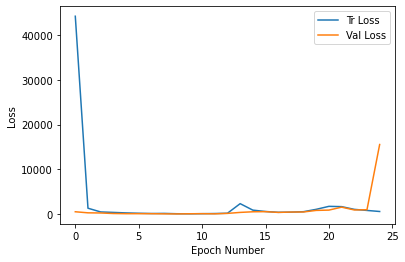

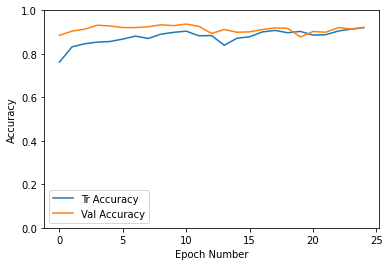

In [12]:
plotCost(history)

Select the best model (i.e. the weights file saved on the max epoch) to test.

In [13]:
saved_model = torch.load('src_model_10.pt')

In [14]:
computeTestSetAccuracy(saved_model, lossFunc)

[4996, 556]
5552
Test Batch number: 000, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 001, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 002, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 003, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 004, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 005, Test: Loss: 164.0612, Accuracy: 0.0000
Test Batch number: 006, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 007, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 008, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 009, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 010, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 011, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 012, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 013, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 014, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 015, Test: Loss: 0.0000, Accuracy: 1.0000
Test 

Test Batch number: 136, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 137, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 138, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 139, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 140, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 141, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 142, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 143, Test: Loss: 1256.8713, Accuracy: 0.0000
Test Batch number: 144, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 145, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 146, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 147, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 148, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 149, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 150, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 151, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 15

Test Batch number: 271, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 272, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 273, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 274, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 275, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 276, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 277, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 278, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 279, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 280, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 281, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 282, Test: Loss: 3000.3423, Accuracy: 0.0000
Test Batch number: 283, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 284, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 285, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 286, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 28

Test Batch number: 415, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 416, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 417, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 418, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 419, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 420, Test: Loss: 736.7958, Accuracy: 0.0000
Test Batch number: 421, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 422, Test: Loss: 2631.3601, Accuracy: 0.0000
Test Batch number: 423, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 424, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 425, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 426, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 427, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 428, Test: Loss: 1704.5182, Accuracy: 0.0000
Test Batch number: 429, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 430, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch numbe

Test Batch number: 560, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 561, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 562, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 563, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 564, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 565, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 566, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 567, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 568, Test: Loss: 451.5653, Accuracy: 0.0000
Test Batch number: 569, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 570, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 571, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 572, Test: Loss: 546.8104, Accuracy: 0.0000
Test Batch number: 573, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 574, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 575, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 5

Test Batch number: 695, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 696, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 697, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 698, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 699, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 700, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 701, Test: Loss: 4945.7388, Accuracy: 0.0000
Test Batch number: 702, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 703, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 704, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 705, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 706, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 707, Test: Loss: 422.4275, Accuracy: 0.0000
Test Batch number: 708, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 709, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 710, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 

Test Batch number: 839, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 840, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 841, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 842, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 843, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 844, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 845, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 846, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 847, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 848, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 849, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 850, Test: Loss: 181.4211, Accuracy: 0.0000
Test Batch number: 851, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 852, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 853, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 854, Test: Loss: 781.1559, Accuracy: 0.0000
Test Batch number: 8

Test Batch number: 986, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 987, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 988, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 989, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 990, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 991, Test: Loss: 1336.1343, Accuracy: 0.0000
Test Batch number: 992, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 993, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 994, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 995, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 996, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 997, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 998, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 999, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1000, Test: Loss: 76.2650, Accuracy: 0.0000
Test Batch number: 1001, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number:

Test Batch number: 1122, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1123, Test: Loss: 751.3156, Accuracy: 0.0000
Test Batch number: 1124, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1125, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1126, Test: Loss: 2021.8967, Accuracy: 0.0000
Test Batch number: 1127, Test: Loss: 674.9396, Accuracy: 0.0000
Test Batch number: 1128, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1129, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1130, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1131, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1132, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1133, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1134, Test: Loss: 516.2684, Accuracy: 0.0000
Test Batch number: 1135, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1136, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1137, Test: Loss: 0.0000, Accuracy: 1.0000

Test Batch number: 1260, Test: Loss: 1708.4701, Accuracy: 0.0000
Test Batch number: 1261, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1262, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1263, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1264, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1265, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1266, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1267, Test: Loss: 1492.5879, Accuracy: 0.0000
Test Batch number: 1268, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1269, Test: Loss: 260.3631, Accuracy: 0.0000
Test Batch number: 1270, Test: Loss: 457.2861, Accuracy: 0.0000
Test Batch number: 1271, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1272, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1273, Test: Loss: 3268.1455, Accuracy: 0.0000
Test Batch number: 1274, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1275, Test: Loss: 0.0000, Accuracy: 1.

In [15]:
transform_example = transforms.Compose([transforms.Resize(size=256),
                            transforms.CenterCrop(size=224),
                            transforms.ToTensor(),
                            transforms.Normalize([0.485, 0.456, 0.406],
                                                 [0.229, 0.224, 0.225])])

dataset = datasets.ImageFolder('examples', transform=transform_example)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


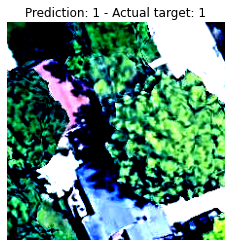

In [16]:
 # Disable grad
with torch.no_grad():
    
    # Retrieve item
    index = 0
    item = dataset[index]
    image = item[0]
    #true_target = item[1]
    imshow(image)
    image=image.to(device)
    # Loading the saved model

    
    # Generate prediction
    prediction = saved_model(image.unsqueeze(0))
    
    # Predicted class value using argmax
    predicted_class = np.argmax(prediction.cpu())
    
    # Reshape image

    image=image.cpu()
    image=image.swapaxes(0,1)
    image=image.swapaxes(1,2)
    
    # Show result
    plt.imshow(image.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: 1')
    plt.show()